PRAVEENA ANAND [CH.SC.U4CSE23044]

**LOGISTIC REGRESSION:**

**Medical Example:**

Importing Required Libraries:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

Importing (Reading) Datasets:

In [3]:
col_names = ['Disease', 'Age', 'Gender', 'Smoker status']
data = pd.read_excel('/content/datatab(1).xlsx', header=None, names=col_names)
print(data.shape)
data.head()

(37, 4)


,Disease,Age,Gender,Smoker status
0,Disease,Age,Gender,Smoker status
1,diseased,43,Male,Smoker
2,not diseased,18,Male,Smoker
3,diseased,22,Female,Non-smoker
4,diseased,25,Male,Non-smoker


Checking for Any Null Values in the Dataset:

In [4]:
data.isnull().sum()

,0
Disease,0
Age,0
Gender,0
Smoker status,0


Assigning Dependent and Independent Variables:

In [5]:
feature_cols = ['Age', 'Gender', 'Smoker status']
x = data[feature_cols]
y = data['Disease']

Encoding Categorical Variables (Gender, Smoker Status):

In [6]:
x = pd.get_dummies(x, drop_first=True)

Splitting the Dataset into Training and Testing Dataset:

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(29, 22)

(29,)

(8, 22)

(8,)

Fitting the Model (Logistic Regression):

In [8]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [9]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Evaluation Metrics:

In [10]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_mat)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy_score)
print('Accuracy in Percentage:', int(accuracy_score * 100), '%')

Confusion Matrix:
 [[0 0 1]
 [0 3 1]
 [0 2 1]]
Accuracy Score: 0.5
Accuracy in Percentage: 50 %


Displaying the Confusion Matrix in a Tabular Form:

<Axes: xlabel='Predicted', ylabel='Actual'>

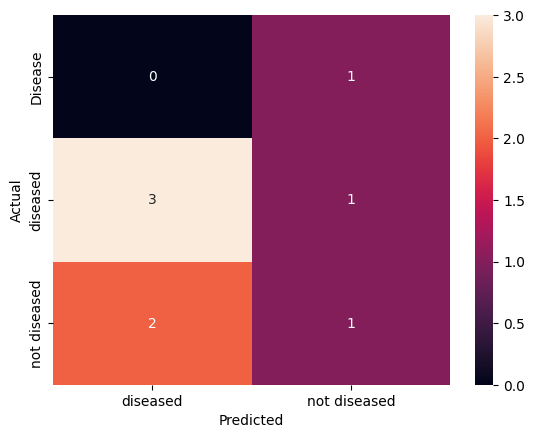

In [11]:
conf_mat_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat_df, annot=True)